<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Regression_Analysis_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import tensorflow as tf

# Equation 1:Linear equation with three inputs/features
* z = nw + mx + oy + 3.5, hence it has three features (w, x, y) and 4 parameters (n=2, m=1, o=12.3 and b=3.5)

<Axes: >

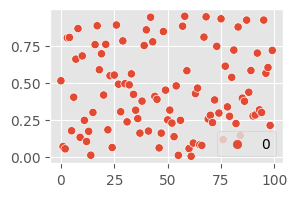

In [2]:
# first generate the fictious data using numpy
# https://www.youtube.com/watch?v=lajKHFfen9g&list=PLMOobVGrchXM0jOmrvJqp-iOPTbHBchaw&index=13
plt.figure(figsize=(3,2))
sns.scatterplot(np.random.uniform(0, 1, size = (100, 1)))

In [3]:
w = np.random.uniform(0,1, size=(1000,1))
x = np.random.uniform(0,1, size=(1000,1))
y = np.random.uniform(0,1, size=(1000,1))

#input
X = np.column_stack((w,x,y))

In [96]:
#create the label (output) and introduce noise to simulate realistic data
# z = nw + mx + oy + 3.5, hence it has three features (w, x, y) and 4 parameters (n=2, m=1, o=12.3 and b=3.5)
noise = np.random.uniform(-10,10, size=(1000,1))
z = 2*w + x + 12.3*y + 3.5 #+ noise
print(z.shape)
z[:5]

(1000, 1)


array([[10.74130994],
       [10.67267912],
       [10.00412137],
       [ 7.14125152],
       [11.65115214]])

In [118]:
# now the data is ready with three features, instantiate the model
model = tf.keras.Sequential()

#build the network with 2 layers
model.add(tf.keras.layers.Dense(3, input_shape=(3,)))
model.add(tf.keras.layers.Dense(1))

#compile/ check for error/calculate loss and metrics
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=[tf.keras.metrics.mse])

#fit and validate the model
history = model.fit(X, z, epochs=20, verbose=0, validation_split=0.2)

In [10]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

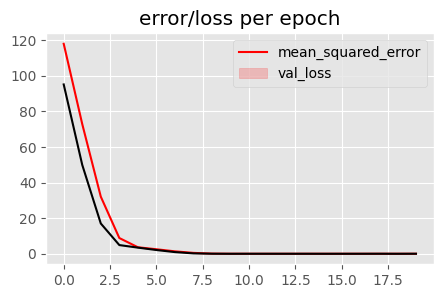

In [119]:
plt.figure(figsize=(5,3))

sns.lineplot(x=history.epoch, y=history.history['mean_squared_error'], color='red')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='k')
plt.title("error/loss per epoch")
plt.legend(['mean_squared_error', 'val_loss'], loc='upper right')
plt.show()

In [120]:
#now lets predict z = nw + mx + oy + 3.5, hence it has three features (w, x, y) and 4 parameters (n=2, m=1, o=12.3 and b=3.5)
# actual value for [10,3,2.3]
print("actual value for input [10,3,2.3] is =", 2*10 + 1*3 + 12.3*2.3 + 3.5)
print("predicted value for input [10,3,2.3] is =", model.predict([[10,3,2.3]], verbose=0)[0][0])

actual value for input [10,3,2.3] is = 54.79
predicted value for input [10,3,2.3] is = 53.726986


In [144]:
model.summary()
#since we have 3 neurons in the dense layer then we have 3 biases, in the output layer we get one bias value as well, for weights we get 3by3 matrix, then 3by1 at the outputlayer
print(f"\nTherefore from the summary: the input to 1st Dense layer weights, the 3by3 matrix, are:\n{model.get_weights()[0]}\n")
print(f"1st Dense layer neuron biases are:\n{model.get_weights()[1]}\n")
print(f"Dense layer to output neuron weights, the 3by1 matrix, are:\n{model.get_weights()[2]}\n")
print(f"output layer neuron bias is: \n{model.get_weights()[3]}\n")

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 12        
                                                                 
 dense_37 (Dense)            (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________

Therefore from the summary: the input to 1st Dense layer weights, the 3by3 matrix, are:
[[ 0.8714146   0.38258547 -0.5997033 ]
 [ 0.01913437 -1.3489248   0.52679276]
 [ 1.7441618  -2.9164853  -2.7518551 ]]

1st Dense layer neuron biases are:
[ 0.59557587 -0.6262303  -0.58973736]

Dense layer to output neuron weights, the 3by1 matrix, are:
[[ 1.5197619]
 [-1.4304993]
 [-1.9490352]]

output layer neuron bias is: 
[0.4934406]



# Equation 2, suppose we have an equation with 5 features as shown below:
* z = m.sin(u) + n.v**2 + o.cos(w) + p.x**3 + q.y + bias

In [103]:
#Lets create sample data
np.random.seed(11) #seeding

u = np.linspace(-100, 100, 1000)
v = np.random.uniform(-10,100, 1000)
w = np.random.uniform(-32,444, 1000)
x = np.random.uniform(-0, 1, 1000)
y = np.random.uniform(-1,1, 1000)

#generate the slopes and itercept/bias (need 5 slopes and 1 intercept)
m, n, o, p, q, b = (np.random.random_sample(6)*10)

#generte the input matrix with 5 input features
X = np.column_stack((u,v,w,x,y))
print("input shape: ", X.shape)
# the output/label is based on the function above
z = m*np.sin(u) + n*np.square(v) + o*np.cos(w) + p*x*np.square(x) + q*y + b
print("label shape: ", z.shape)

input shape:  (1000, 5)
label shape:  (1000,)


#### Build the network without normalization

In [ ]:
#first define a plotting function
def pltModel(l, v, title):
  plt.figure(figsize=(7,3))
  sns.lineplot(x=history.epoch,
              y=history.history[l])
  sns.lineplot(x=history.epoch,
              y=history.history[v], color='k')
  plt.title(title)
  plt.legend([l, v], loc='upper right')
  plt.show()

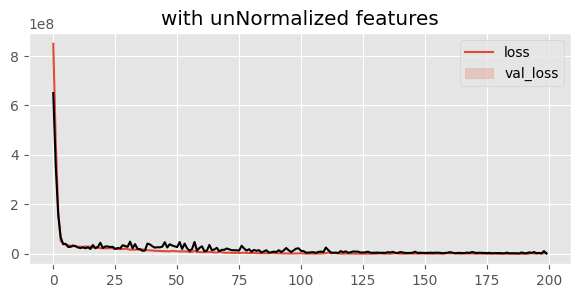


predicted ouput:  83.767586
Actual output:  -33.25609398454687


In [174]:
#instntiate the model
model = tf.keras.Sequential()

#build the network 2 dense layer and an output layer with relu activations

model.add(tf.keras.layers.Dense(32, #input neurons of the dense layer
                                tf.keras.activations.relu, 
                                input_shape=(5,))) 
model.add(tf.keras.layers.Dense(32, #neurons of the second dense layer
                                tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(32, #neurons of the third dense layer
                                tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1)) #output layer for 1 label output
                                # tf.keras.activations.relu))

#compile the model, optimise, check for error, and metrics
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.mse])

#fit the model, save it in history, split the data into validation and testing
history = model.fit(X, 
          z, 
          epochs=200,
          validation_split=0.2,
          verbose=0)
#plot loss
pltModel('loss', 'val_loss', 'with unNormalized features')

#predict and compare with the actual output
print("\npredicted ouput: ", model.predict([[0.02, 0.01, -1.2, -2, -2.3]], 
                                           verbose=0)[0][0])
print("Actual output: ", m*np.sin(0.02) + n*np.square(0.01) + o*np.cos(-1.2) + p*(-2*-2*-2) + q*-2.3 + b)

# Normalize the data before running it through the NN model.

In [20]:
def minMaxScaler(m):
  return (m - np.min(m, axis=0))/(np.max(m, axis=0)-np.min(m, axis=0))

In [111]:
X_scaled = minMaxScaler(X)
X_scaled[-2:]

array([[0.998999  , 0.22403008, 0.69488612, 0.78921447, 0.76419182],
       [1.        , 0.68202325, 0.47185011, 0.58514704, 0.51574003]])

#Build the network with input features normalized

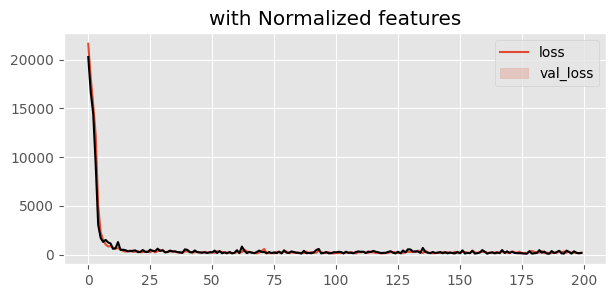


predicted ouput:  388.8337
Actual output:  -33.25609398454687


In [176]:
from keras.engine.training import optimizer
# instantiate the model
model = tf.keras.Sequential()

# build the Network with less number of layers/neurons and add as needed
model.add(tf.keras.layers.Dense(32, tf.keras.activations.relu, input_shape=(5,)))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(32, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

# compile the model: optimse and check for error
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.mae]
              )
# fit and validate
history = model.fit(X_scaled, z, epochs=200, validation_split=0.2, verbose=0)

# plot loss and val loss
pltModel('loss', 'val_loss', 'with Normalized features')

#predict and compare with the actual output
print("\npredicted ouput: ", model.predict([[0.02, 0.01, -1.2, -2, -2.3]], 
                                           verbose=0)[0][0])
print("Actual output: ", m*np.sin(0.02) + n*np.square(0.01) + o*np.cos(-1.2) + p*(-2*-2*-2) + q*-2.3 + b)